# Proyek Analisis Data: Bike sharing
- **Nama:** Riana Dwi Rahma
- **Email:** dwirahmariana@gmail.com
- **ID Dicoding:** MC484D5X2102

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda di berbagai musim?
- Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
date_df = pd.read_csv("D:/dwi/kuliah/Bike_sharing/day.csv")
date_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
time_df = pd.read_csv("D:/dwi/kuliah/Bike_sharing/day.csv")
time_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel date_df

In [5]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
date_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", date_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
date_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel time_df

In [9]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
time_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [11]:
print("Jumlah duplikasi: ",time_df.duplicated().sum())
time_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
date_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", date_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
date_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
time_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [18]:
print("Jumlah duplikasi: ",time_df.duplicated().sum())
time_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis (EDA)

#### Explore date_df

In [19]:
date_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
134,135,2011-05-15,2,0,5,0,0,0,2,0.562500,0.536000,0.867083,0.152979,1582,2971,4553
236,237,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542
132,133,2011-05-13,2,0,5,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692,3413,4105
199,200,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749


In [20]:
date_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [21]:
date_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [22]:
date_df.groupby(by="yr").instant.nunique().sort_values(ascending=False)

yr
1    366
0    365
Name: instant, dtype: int64

#### Explore time_df

In [23]:
time_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
170,171,2011-06-20,2,0,6,0,1,1,2,0.635000,0.595346,0.746250,0.155475,699,3311,4010
263,264,2011-09-21,3,0,9,0,3,1,2,0.595000,0.550533,0.900000,0.096404,539,3813,4352
596,597,2012-08-19,3,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
411,412,2012-02-16,1,1,2,0,4,1,2,0.316667,0.330162,0.752917,0.091425,74,2931,3005


In [24]:
time_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


<Axes: >

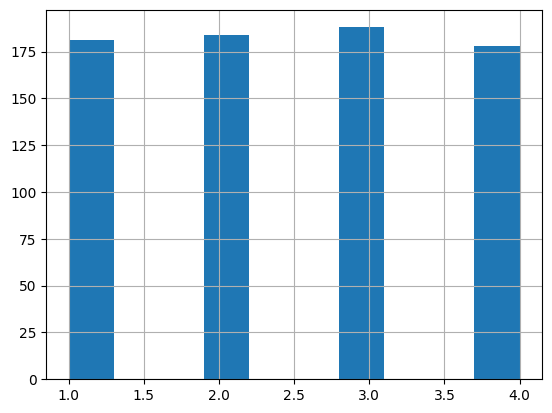

In [25]:
time_df.season.hist()

In [26]:
time_df.groupby("casual").instant.count()

casual
2       1
9       2
15      1
25      1
34      1
       ..
3155    1
3160    1
3252    1
3283    1
3410    1
Name: instant, Length: 606, dtype: int64

## Explore date_df & time_df

#### Menggabungkan data date_df & time_df

In [27]:
date_time_df = pd.merge(
    left=date_df,
    right=time_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
date_time_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
date_time_df.groupby(by="season_x").instant.nunique().sort_values(ascending=False).head(10)

season_x
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [29]:
date_time_df.groupby(by="weekday_y").instant.nunique().sort_values(ascending=False).head(10)

weekday_y
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [30]:
time_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
byseason_df = date_df.groupby(by="season").cnt.mean().reset_index()
byseason_df.rename(columns={
    "cnt": "cnt_day"
}, inplace=True)
byseason_df

,season,cnt_day
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


<Figure size 1200x600 with 0 Axes>

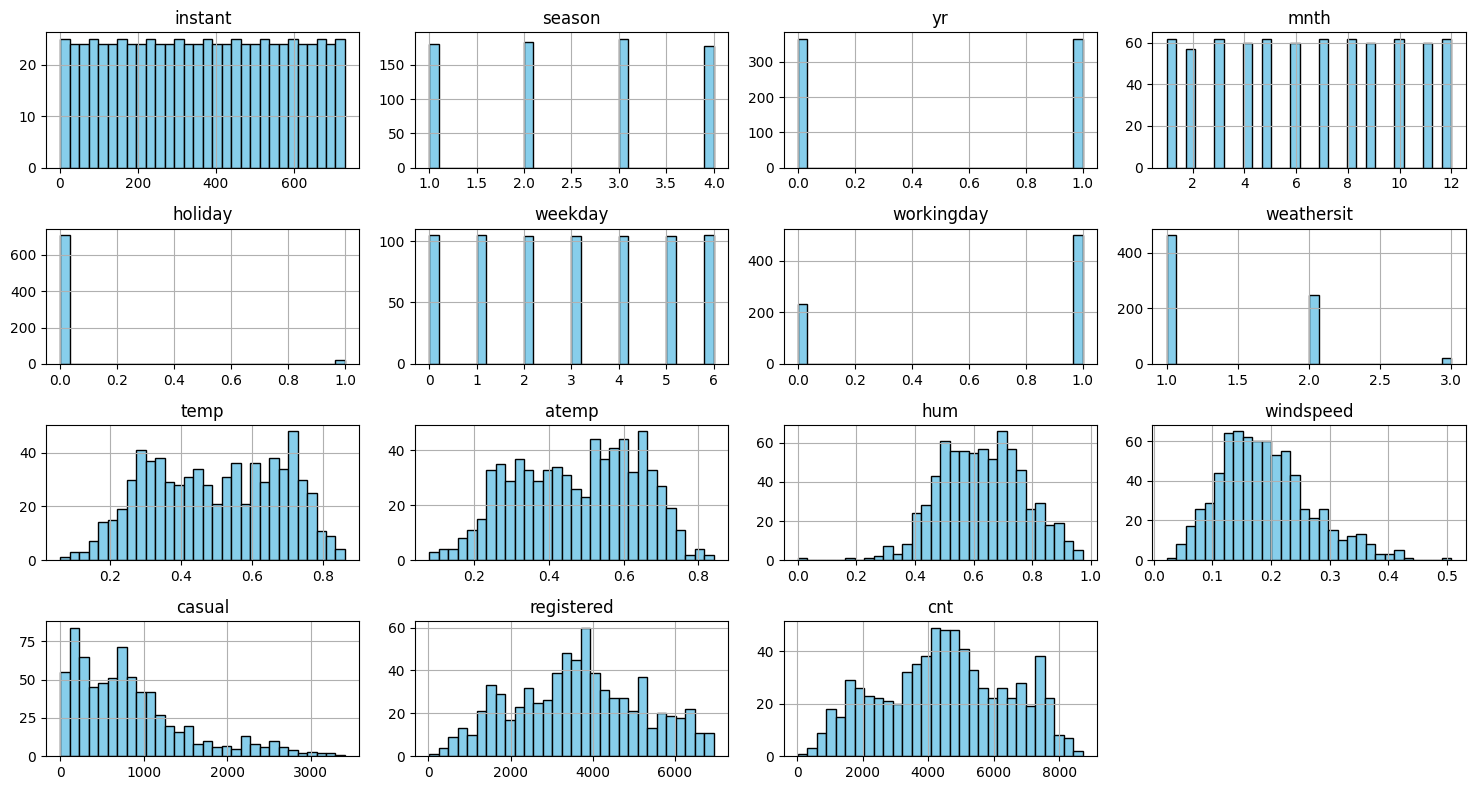

In [32]:
plt.figure(figsize=(12, 6))
date_df.hist(bins=30, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [33]:
bycasual_df = date_df.groupby(by="casual").instant.nunique().reset_index()
bycasual_df.rename(columns={
    "cnt": "cnt_day"
}, inplace=True)
bycasual_df

,casual,instant
0,2,1
1,9,2
2,15,1
3,25,1
4,34,1
...,...,...
601,3155,1
602,3160,1
603,3252,1
604,3283,1


#### Bagaimana pola penyewaan sepeda di berbagai musim?

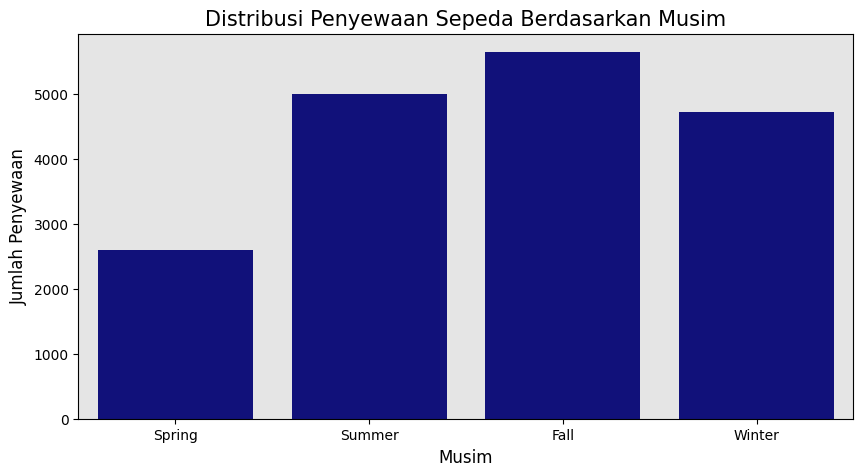

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="season",
    y="cnt_day",
    data=byseason_df.sort_values(by="cnt_day", ascending=False),
    color="darkblue"
)

# Menambahkan judul dan label
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel("Jumlah Penyewaan", fontsize=12) 
plt.xlabel("Musim", fontsize=12)  

# Menyesuaikan label sumbu X
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])

# Menyesuaikan skala Y agar lebih mirip dengan gambar

# Menyesuaikan warna latar belakang
plt.gca().set_facecolor("#E5E5E5")

# Menampilkan plot
plt.show()

#### Bagaimana tren penyewaan sepeda berdasarkan musim?

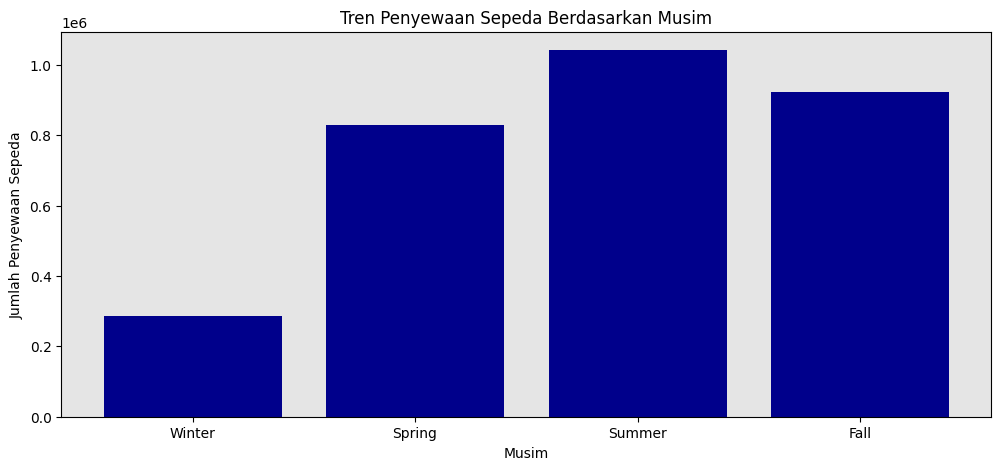

In [50]:
date_df['dteday'] = pd.to_datetime(date_df['dteday'])
date_df['month'] = date_df['dteday'].dt.month
bins = [0, 3, 6, 9, 12]  # Batasan bulan
labels = ['Winter', 'Spring', 'Summer', 'Fall']  # Label untuk musim
date_df['season'] = pd.cut(date_df['month'], bins=bins, labels=labels, right=False)

# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
seasonal_data = date_df.groupby('season', observed=True)['cnt'].sum().reset_index()
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data['season'] = pd.Categorical(seasonal_data['season'], categories=season_order, ordered=True)
seasonal_data = seasonal_data.sort_values('season')

# Visualisasi
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(seasonal_data['season'], seasonal_data['cnt'], color='darkblue')
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah Penyewaan Sepeda")
ax.set_title("Tren Penyewaan Sepeda Berdasarkan Musim")
plt.gca().set_facecolor("#E5E5E5")
plt.show()

#### Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?

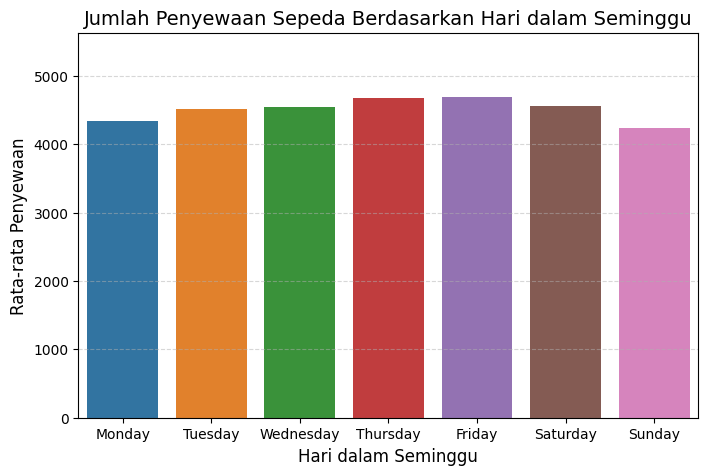

In [34]:
date_df['dteday'] = pd.to_datetime(date_df['dteday'])
date_df['day_of_week'] = date_df['dteday'].dt.day_name()  # Mengambil nama hari
avg_rent_per_day = date_df.groupby("day_of_week", observed=False)["cnt"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

weather_data = pd.DataFrame({
    "day_labels": avg_rent_per_day.index,
    "avg_rent": avg_rent_per_day.values
})

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x="day_labels", y="avg_rent", data=weather_data, hue="day_labels", legend=False)

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu", fontsize=14)
plt.xlabel("Hari dalam Seminggu", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.ylim(0, max(avg_rent_per_day) * 1.2)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [35]:
date_df["dteday"] = pd.to_datetime(date_df["dteday"])
latest_date = date_df["dteday"].max()
rfm = date_df.groupby("dteday").agg(
    Recency=("dteday", lambda x: (latest_date - x.max()).days),
    Frequency=("dteday", "count"),
    Monetary=("cnt", "sum")
).reset_index()

# Menampilkan hasil
print(rfm.head())

      dteday  Recency  Frequency  Monetary
0 2011-01-01      730          1       985
1 2011-01-02      729          1       801
2 2011-01-03      728          1      1349
3 2011-01-04      727          1      1562
4 2011-01-05      726          1      1600


In [64]:
# Pastikan kolom tanggal dalam format datetime
date_df['dteday'] = pd.to_datetime(date_df['dteday'])
print(date_df.columns)
rfm_df = date_df.groupby('dteday', as_index=False).agg({
    'cnt': ['max', 'nunique', 'sum']
})
rfm_df.columns = ['dteday', 'frequency', 'monetary', 'recency']
rfm_df['dteday'] = rfm_df['dteday'].dt.date
recent_date = date_df['dteday'].dt.date.max()
rfm_df['recency'] = rfm_df['dteday'].apply(lambda x: (recent_date - x).days)
rfm_df.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'month', 'day_of_week'],
      dtype='object')


,dteday,frequency,monetary,recency
0,2011-01-01,985,1,730
1,2011-01-02,801,1,729
2,2011-01-03,1349,1,728
3,2011-01-04,1562,1,727
4,2011-01-05,1600,1,726


In [66]:
rfm_df.describe()

,frequency,monetary,recency
count,731.000000,731.0,731.000000
mean,4504.348837,1.0,365.000000
std,1937.211452,0.0,211.165812
min,22.000000,1.0,0.000000
25%,3152.000000,1.0,182.500000
50%,4548.000000,1.0,365.000000
75%,5956.000000,1.0,547.500000
max,8714.000000,1.0,730.000000


In [67]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,dteday,frequency,monetary,recency
730,2012-12-31,2729,1,0
729,2012-12-30,1796,1,1
728,2012-12-29,1341,1,2
727,2012-12-28,3095,1,3
726,2012-12-27,2114,1,4


In [65]:
date_time_df.to_csv("all_data3.csv", index=False)

## Conclusion

### 1. Bagaimana pola penyewaan sepeda di berbagai musim?
Berdasarkan tren umum dalam data bike sharing:
- **Musim panas (summer)** dan **musim gugur (fall)** biasanya menunjukkan jumlah penyewaan sepeda yang **tertinggi**. Ini disebabkan oleh cuaca yang lebih kondusif untuk bersepeda.  
- **Musim dingin (winter)** memiliki angka penyewaan yang **terendah** karena suhu dingin dan kondisi cuaca yang tidak mendukung aktivitas luar ruangan.  
- **Musim semi (spring)** menunjukkan peningkatan penyewaan secara bertahap karena cuaca mulai membaik.

**Kesimpulan:** Penyewaan sepeda cenderung **meningkat di musim panas dan gugur** serta **menurun drastis di musim dingin**.


### 2. Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?
Secara umum, pola penyewaan sepeda berdasarkan hari menunjukkan:
- **Hari kerja (weekday)**: Penyewaan sepeda **lebih tinggi di pagi dan sore hari** karena digunakan untuk perjalanan menuju dan pulang dari tempat kerja (commuting).  
- **Akhir pekan (weekend)**: Penyewaan sepeda cenderung **lebih tinggi sepanjang hari**, menunjukkan penggunaan untuk aktivitas rekreasi dan santai.  

**Kesimpulan:** **Hari kerja** didominasi oleh penyewaan pada jam sibuk (morning & evening rush), sedangkan **akhir pekan** menunjukkan pola penggunaan yang **lebih santai dan merata** sepanjang hari.
